# Intensity vs Fermi Chopper frequency -- Chopper 2

Just try the original parameters

In [1]:
cd ~/dv/sns-chops/resolution/ARCS/PyChop/

/SNS/users/lj7/dv/sns-chops/resolution/ARCS/PyChop


In [2]:
import numpy as np, os, sys, glob
from matplotlib import pyplot as plt

In [3]:
%matplotlib notebook

Exp data

In [4]:
import Vdata2018
reload(Vdata2018)

<module 'Vdata2018' from 'Vdata2018.pyc'>

In [5]:
# expdata = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_FC1_2018.dat'))
expdata = Vdata2018.ExpData(os.path.join(Vdata2018.datadir, './V_Cali_Int_Res_FC2_2018_v2.dat'))

reading data. please wait...
  done


In [6]:
unique_nominal_Eis = set( list(expdata.Ei_list)) 

In [7]:
# unique_nominal_Eis

In [8]:
Ei = 100.

In [9]:
condition = np.isclose(expdata.vdata.Energy, Ei)

In [10]:
expdata.vdata.RunNumber[condition]

13     108045.0
32     108064.0
69     108101.0
82     108114.0
106    108138.0
119    108151.0
137    108169.0
152    108184.0
174    107983.0
198    108007.0
217    108026.0
Name: RunNumber, dtype: float64

In [11]:
expdata.chopper_freqs[condition]

array([ 180.,  240.,  300.,  360.,  420.,  480.,  540.,  600.,   60.,
         60.,  120.])

In [12]:
expdata.intensity[condition]

13     0.047989
32     0.092800
69     0.146532
82     0.197324
106    0.219014
119    0.219504
137    0.203566
152    0.167151
174    0.000040
198    0.037037
217    0.025783
dtype: float64

<IPython.core.display.Javascript object>


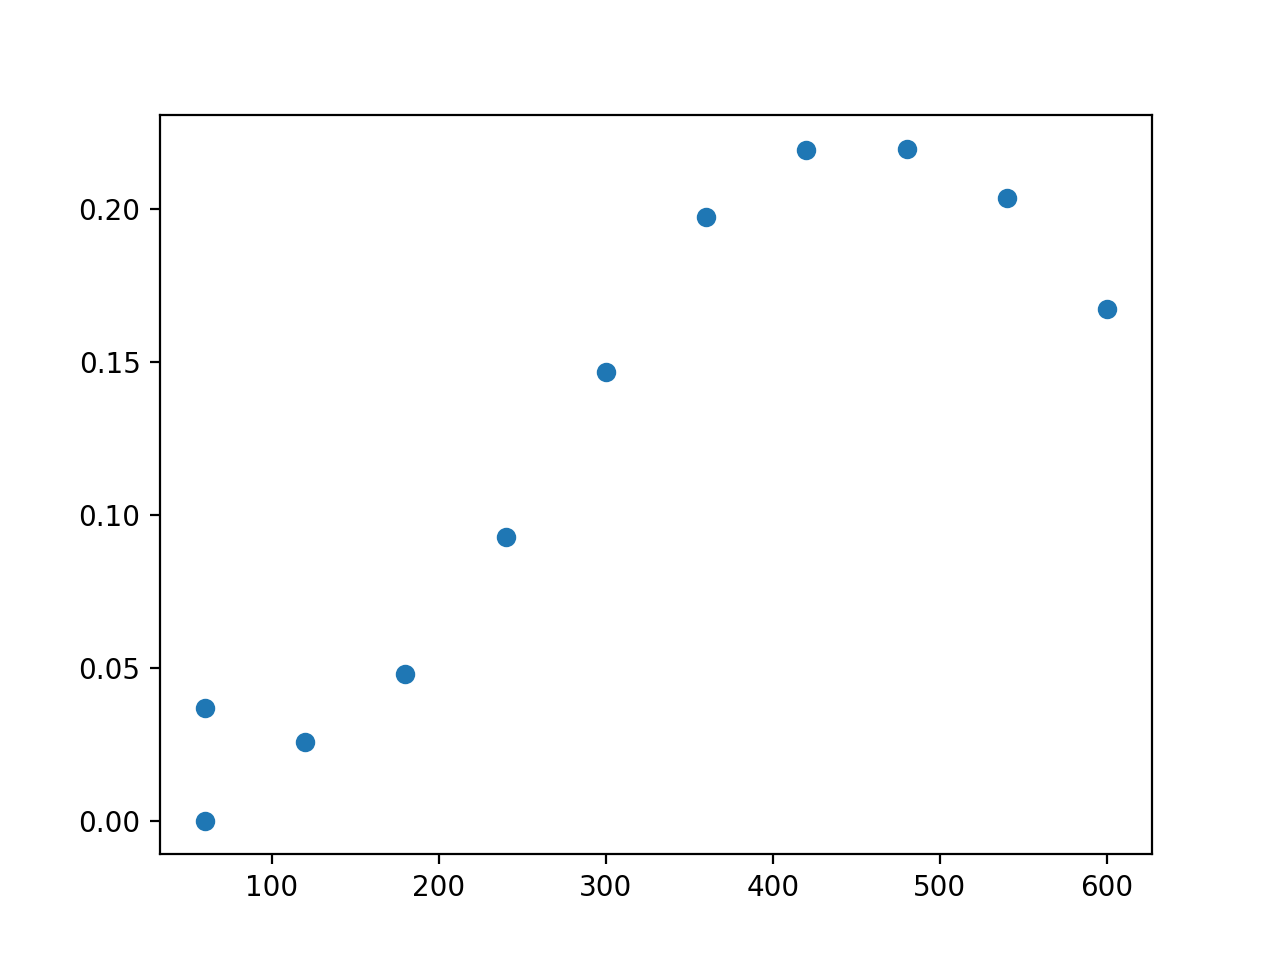

In [13]:
plt.figure()
freqs = expdata.chopper_freqs[condition]
plt.plot(freqs, expdata.intensity[condition], 'o')

PyChop

In [14]:
sys.path.insert(0, "/SNS/users/lj7/dv")

In [15]:
from PyChop import PyChop2

In [18]:
instrument = PyChop2('arcs-opt.yaml', 'ARCS-100-1.5-SMI', 600)

In [20]:
instrument.getFlux(Ei_in=100)

array([ 10943.44208499])

In [25]:
def intensity_pychop(
    fc_freq,
    E=0, 
    aperture_width=0.1751, S1=281., S2=79., B1=0.087, B2=0.4, Emod=172., 
    Ei = 100.,
    fc_pslit = 1.5, fc_pslat = 0.41, fc_radius=50., fc_rho = 580.,
    fc_choice='ARCS-100-1.5-SMI'):
    
    template = open('./arcs-opt-template.yaml').read()
    content = template.format(aperture_width=aperture_width)
    optyaml = 'arcs-opt.yaml'
    with open(optyaml, 'wt') as of:
        of.write(content)
    instrument = PyChop2(optyaml, fc_choice, fc_freq)
    instrument.ei = Ei
    instrument.moderator.mod_pars = [S1, S2, B1, B2, Emod]
    # print instrument.moderator.mod_pars

    fc = instrument.chopper_system.packages[fc_choice]
    fc.pslit = fc_pslit
    fc.pslat = fc_pslat
    fc.radius = fc_radius
    fc.rho = fc_rho
    res = instrument.getFlux(Ei)
    ret = res[0]
    # if not np.isfinite(ret):
    #    ret = 0.
    return ret

In [17]:
from PyChop import Chop
reload(Chop)

<module 'PyChop.Chop' from '/SNS/users/lj7/dv/PyChop/Chop.pyc'>

In [35]:
scale = 2e-5

/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 100.000 meV at 180 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWarning)
/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 100.000 meV at  60 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWarning)
/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 100.000 meV at  60 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWarning)
/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 100.000 meV at 120 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWarning)


<IPython.core.display.Javascript object>


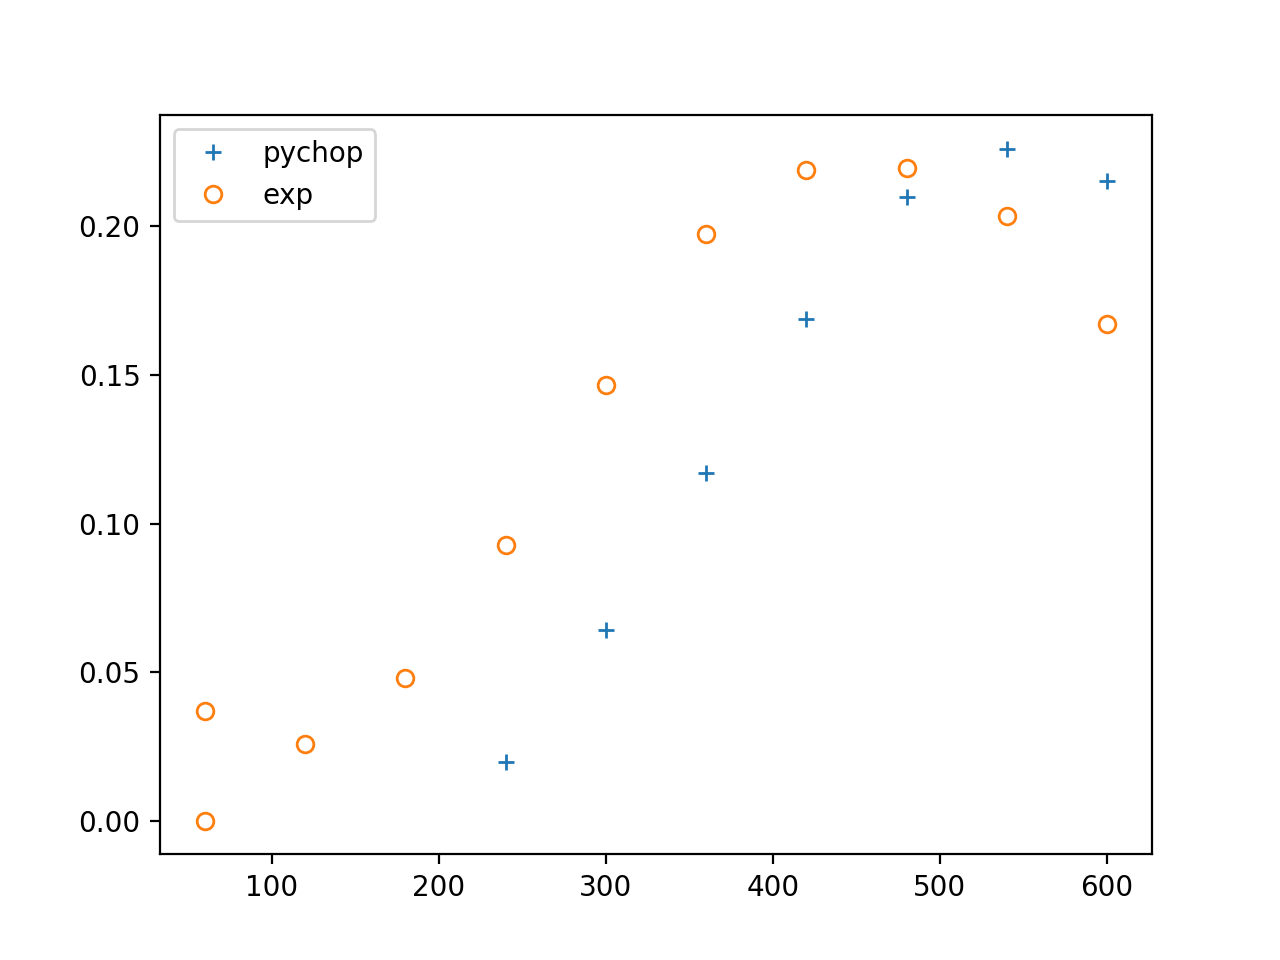

In [32]:
res = [intensity_pychop(fc_freq=f) for f in freqs]
plt.figure()
plt.plot(freqs, np.array(res)*scale, '+', label='pychop')
plt.plot(freqs, expdata.intensity[condition], 'o', mfc='none', label='exp')
#plt.ylim(3, 6.5)
plt.legend()

# Try plotting more Eis

In [34]:
def getExpXY(Ei):
    "return freq, intensity"
    condition = np.isclose(expdata.vdata.Energy, Ei)
    x = expdata.chopper_freqs[condition]
    y = expdata.intensity[condition]
    return x,y

/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 100.000 meV at 180 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWarning)
/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 100.000 meV at  60 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWarning)
/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 100.000 meV at  60 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWarning)
/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 100.000 meV at 120 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWarning)


<IPython.core.display.Javascript object>


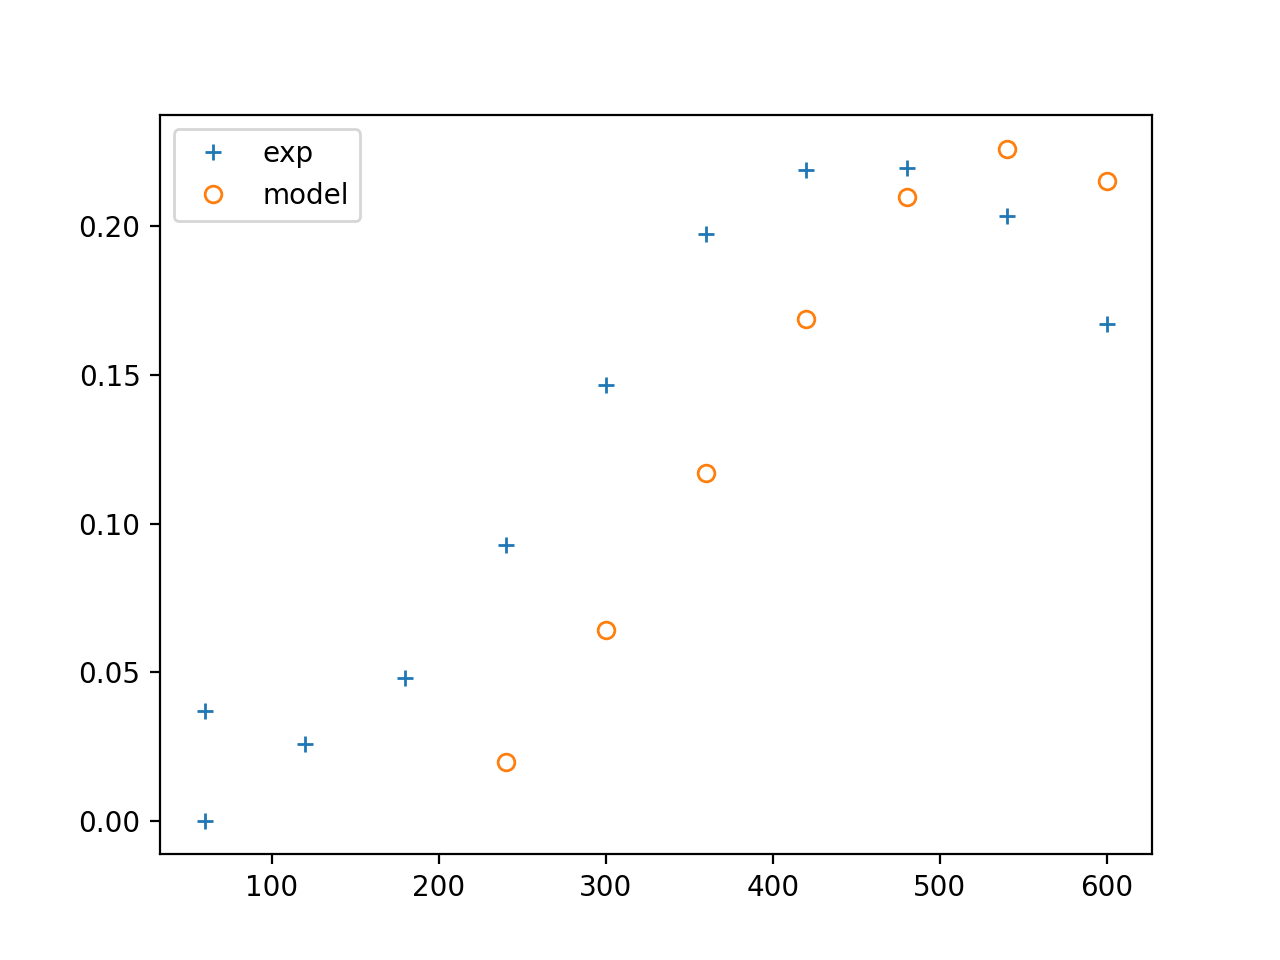

In [36]:
Ei = 100
freqs, expInt = getExpXY(Ei)
modelInt = np.array([intensity_pychop(fc_freq=f) for f in freqs])

plt.figure()
plt.plot(freqs, expInt, '+', label='exp')
plt.plot(freqs, modelInt*scale, 'o', mfc='none', label='model')
# plt.ylim(3, 6.5)
plt.legend()

In [37]:
set(expdata.vdata.Energy)

{8.0,
 10.0,
 12.0,
 15.0,
 20.0,
 25.0,
 30.0,
 40.0,
 50.0,
 60.0,
 70.0,
 80.0,
 90.0,
 100.0,
 125.0,
 150.0,
 200.0,
 250.0,
 300.0,
 400.0,
 500.0,
 600.0}

<IPython.core.display.Javascript object>


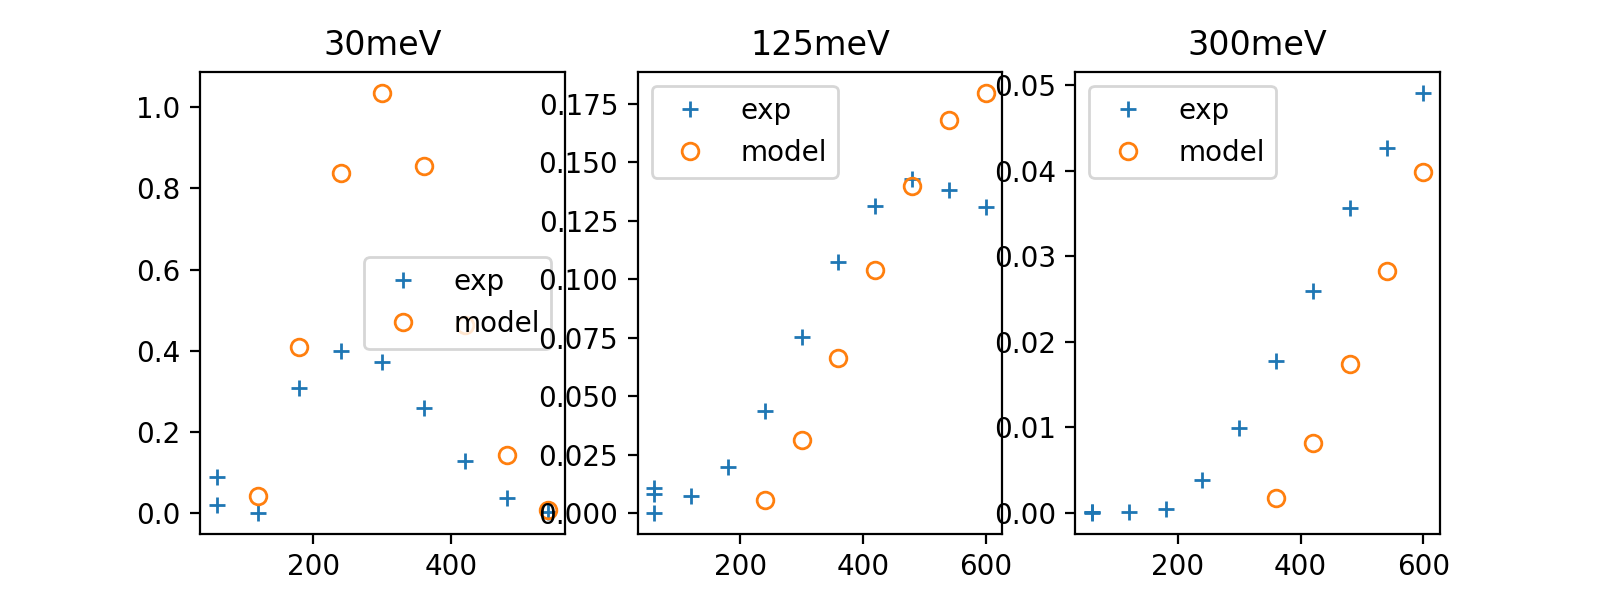

/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 30.000 meV at  60 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWarning)
/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 30.000 meV at  60 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWarning)
/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 125.000 meV at 180 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWarning)
/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 125.000 meV at  60 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f meV at %3d Hz' % (Ei, freq), UserWarning)
/SNS/users/lj7/dv/PyChop/Chop.py:92: UserWarning: PyChop: achop(): No transmission at 125.000 meV at  60 Hz
  warnings.warn('PyChop: achop(): No transmission at %5.3f

In [38]:
Eilist = [30, 125, 300]
N = len(Eilist)
plt.figure(figsize=(8,3))

for i, Ei in enumerate(Eilist):
    freqs, expInt = getExpXY(Ei)
    modelInt = np.array([intensity_pychop( fc_freq=f, Ei=Ei) for f in freqs])

    plt.subplot(1, N, i+1)
    plt.title('%smeV' % Ei)
    plt.plot(freqs, expInt, '+', label='exp')
    plt.plot(freqs, modelInt*scale, 'o', mfc='none', label='model')
    # plt.ylim(3, 6.5)
    plt.legend()

These were parameters obtained by fitting to old C4H2I2S data (Res vs E)

<IPython.core.display.Javascript object>


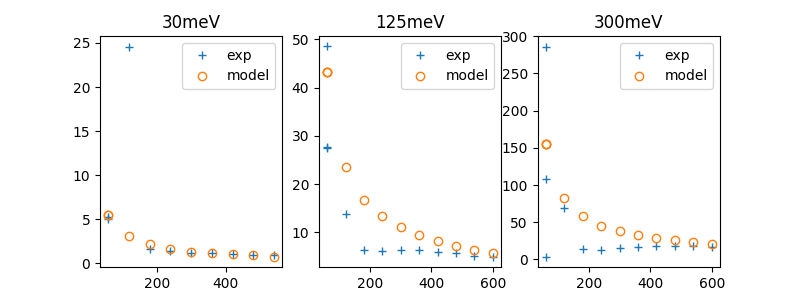

In [32]:
Eilist = [30, 125, 300]
N = len(Eilist)
plt.figure(figsize=(8,3))

opts = dict(
    fc_pslit=        3.63098625,
    S2=              200.000000,
    S1=              600.000000,
    aperture_width=  0.01000086,
    B1=              0.19999951,
    B2=              0.40000000,
    Emod=           100.000000,
)
for i, Ei in enumerate(Eilist):
    freqs, expFWHM = getExpXY(Ei)
    modelFWHM = [FWHM_pychop(E=0., fc_freq=f, Ei=Ei, **opts) for f in freqs]

    plt.subplot(1, N, i+1)
    plt.title('%smeV' % Ei)
    plt.plot(freqs, expFWHM, '+', label='exp')
    plt.plot(freqs, modelFWHM, 'o', mfc='none', label='model')
    # plt.ylim(3, 6.5)
    plt.legend()

# All energies

In [39]:
unique_nominal_Eis

{8.0,
 10.0,
 12.0,
 15.0,
 20.0,
 25.0,
 30.0,
 40.0,
 50.0,
 60.0,
 70.0,
 80.0,
 90.0,
 100.0,
 125.0,
 150.0,
 200.0,
 250.0,
 300.0,
 400.0,
 500.0,
 600.0}

<IPython.core.display.Javascript object>


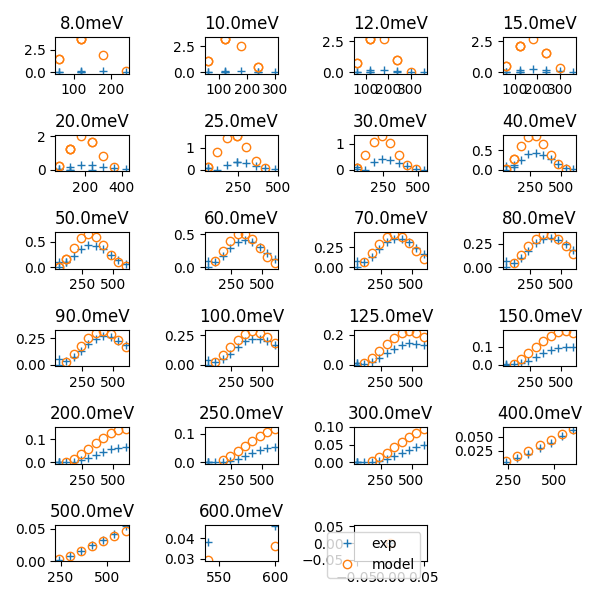

In [48]:
Ei_list = sorted(unique_nominal_Eis)
N = len(Ei_list)
cols = 4
# rows = (N-1)//cols + 1
rows = N//cols + 1
plt.figure(figsize=(6,6))

import warnings
for i, Ei in enumerate(Ei_list):
    freqs, expInt = getExpXY(Ei)
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        modelInt = np.array([intensity_pychop(fc_freq=f, Ei=Ei, fc_rho=700.) for f in freqs])

    plt.subplot(rows, cols, i+1)
    plt.title('%smeV' % Ei)
    plt.plot(freqs, expInt, '+', label='exp')
    plt.plot(freqs, modelInt*scale, 'o', mfc='none', label='model')
    # plt.ylim(3, 6.5)
plt.subplot(rows, cols, N+1)
plt.plot([0], [0], '+', label='exp')
plt.plot([0], [0], 'o', mfc='none', label='model')
plt.legend()
plt.tight_layout()

# Check pychop impl.

In [49]:
from mcni.utils import conversion as C

In [51]:
C.k2e

<function mcni.utils.conversion.k2e>

In [54]:
instrument.moderator.measured_flux['wavelength']

[0.0285984265,
 0.2335051748,
 0.2859842653,
 0.310193488,
 0.3418165757,
 0.3856211047,
 0.4521808267,
 0.4834016372,
 0.522133444,
 0.5719685306,
 0.6394802577,
 0.6936137254,
 0.7643250991,
 0.8255654628,
 0.9043616533,
 0.9809179374,
 1.0809189212,
 1.2194410046,
 1.4299213265,
 1.5286501982,
 1.6511309256,
 1.8087233066,
 2.0222141331,
 2.3350517482]

In [58]:
C.k2e(300)

186490.96617667977

<IPython.core.display.Javascript object>


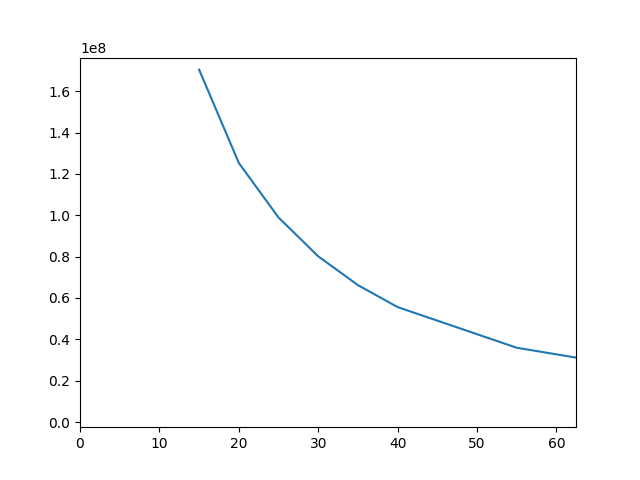

(0, 1000)

In [62]:
wavelen = np.array(instrument.moderator.measured_flux['wavelength'])
plt.figure()
plt.plot(
    C.k2e(2*np.pi/wavelen),
    wavelen* instrument.moderator.measured_flux['flux']
)
plt.xlim(0, 1000)

In [66]:
instrument.moderator.getFlux(20)

array([ 61973584.35755062])

# Try my implementation of flux
This flux is the moderator flux, not the flux on fermi chopper

In [69]:
sys.path.insert(0, '/SNS/users/lj7/dv/sns-chops/snschops/')

In [70]:
from snschops.moderator import arcs_model

<IPython.core.display.Javascript object>


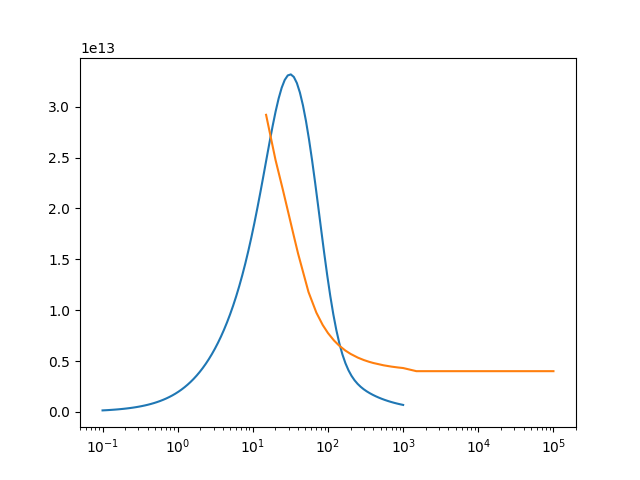

In [99]:
E = np.logspace(-4, 0, 100) # eV

flux = arcs_model.model.I_E(E)

plt.figure()
plt.semilogx(E*1e3, flux)
plt.semilogx(
    C.k2e(2*np.pi/wavelen),
    instrument.moderator.measured_flux['flux']*4e5
)

In [88]:
v=C.e2v(E*1000)

<IPython.core.display.Javascript object>


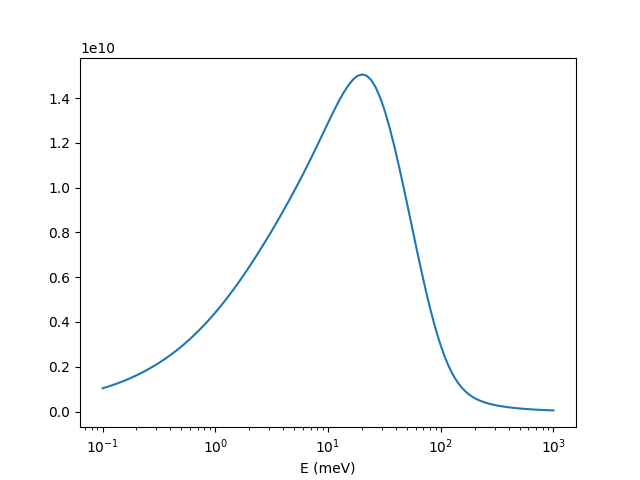

Text(0.5,0,u'E (meV)')

In [92]:
plt.figure()
plt.semilogx(E*1e3, flux/v)
plt.xlabel('E (meV)')

# White beam flux


digitized the I(E) curve of ARCS beam monitor data (Fig. 5 of ARCS paper)

In [105]:
bm_E, bm_I = np.loadtxt('./ARCSBeamMonitor-I_E.csv', delimiter=',').T

<IPython.core.display.Javascript object>


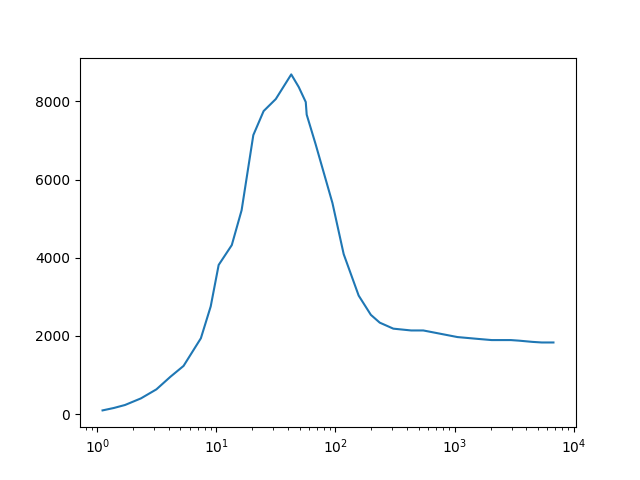

In [107]:
plt.figure()
plt.semilogx(bm_E, bm_I)

This is not flux, but flux / v. let us get flux

<IPython.core.display.Javascript object>


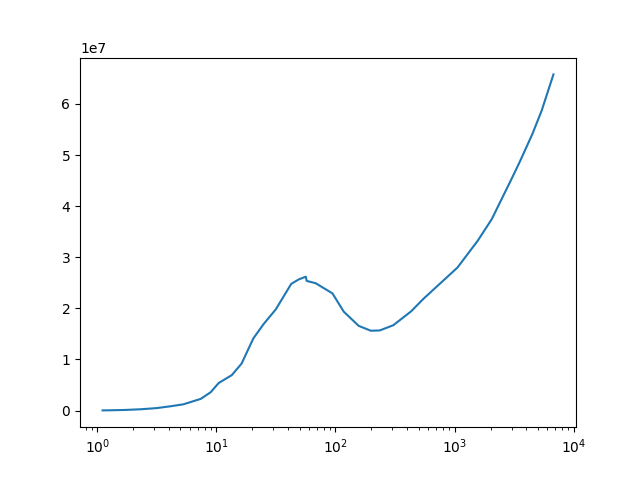

In [108]:
bm_flux = bm_I * C.e2v(bm_E)
plt.figure()
plt.semilogx(bm_E, bm_flux)